In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 16,12
RANDOM_SEED = 101
LABELS = ['Normal' , 'Fraud']


In [2]:
# import dataset
data = pd.read_csv('CreditCard.csv' , sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Preprocessing
#step 1: check missing data
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# step 2: Encoding
#since there is no char variable so need to do the encoding

In [6]:
# step 3 : check outlier
# since it's classification problem and also most of the variable value fall under 0 and 1

In [7]:
# step 4: Feature scaling
# since the values are close to each other so need to do the feature scaling 

In [8]:
# step 5 : check imbalance dataset
data['Class'].value_counts()     # there is a imbalance dataset

# but here we cannot handle imbalance dataset bcoz this is domain specific problem . 

0    284315
1       492
Name: Class, dtype: int64

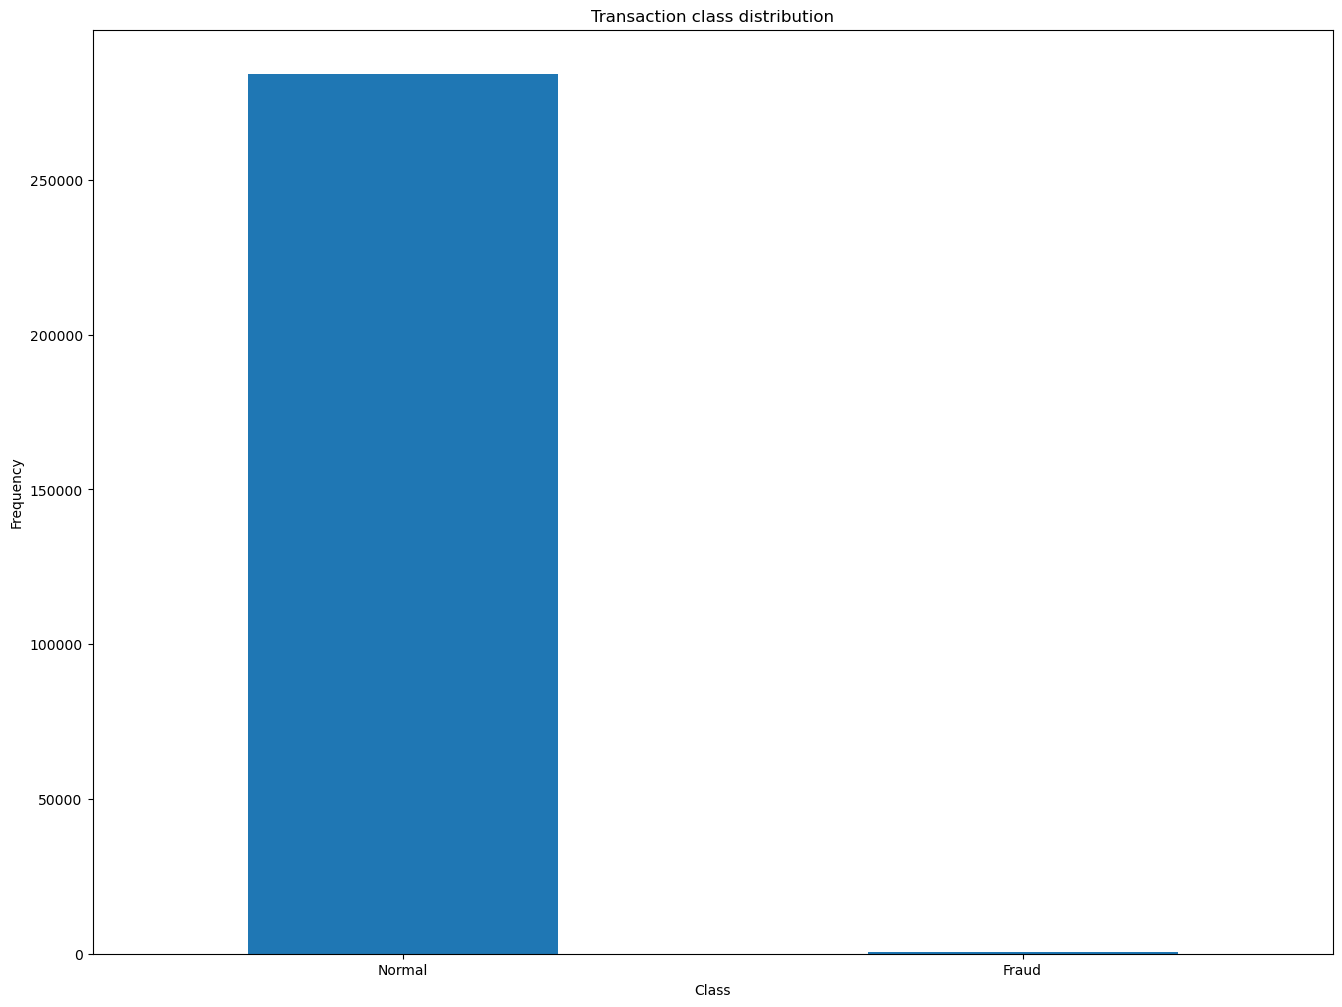

In [9]:
# step 6: EDA

count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind = 'bar' , rot = 0)
plt.title('Transaction class distribution')
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [10]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print(fraud.shape , normal.shape)

(492, 31) (284315, 31)


In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

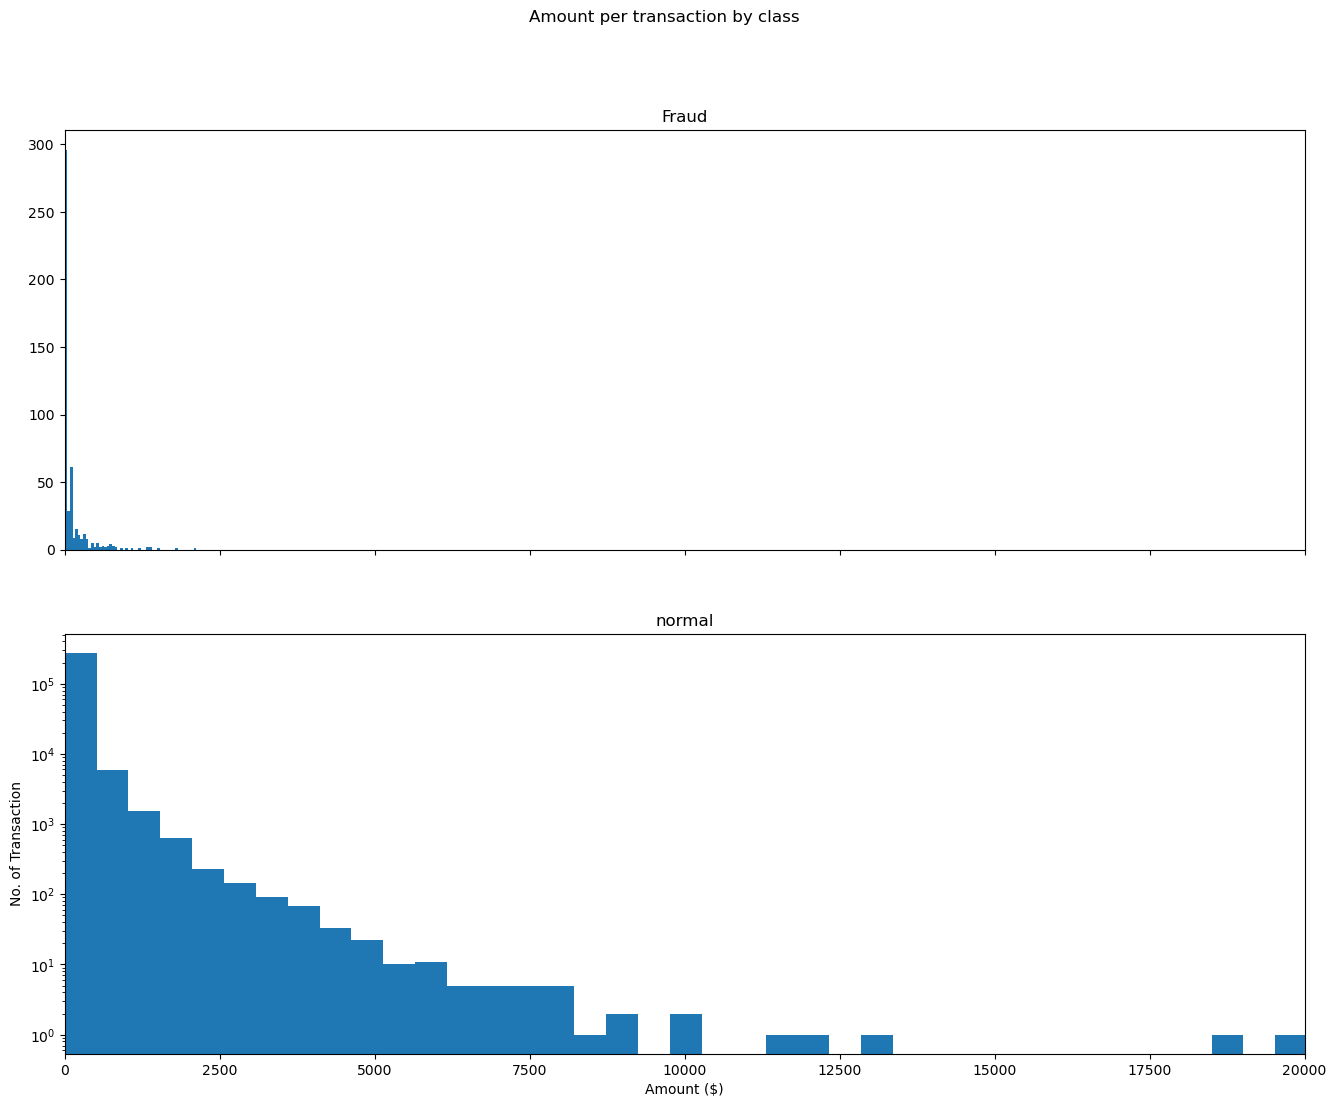

In [13]:
f,(ax1 , ax2) = plt.subplots(2,1 , sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

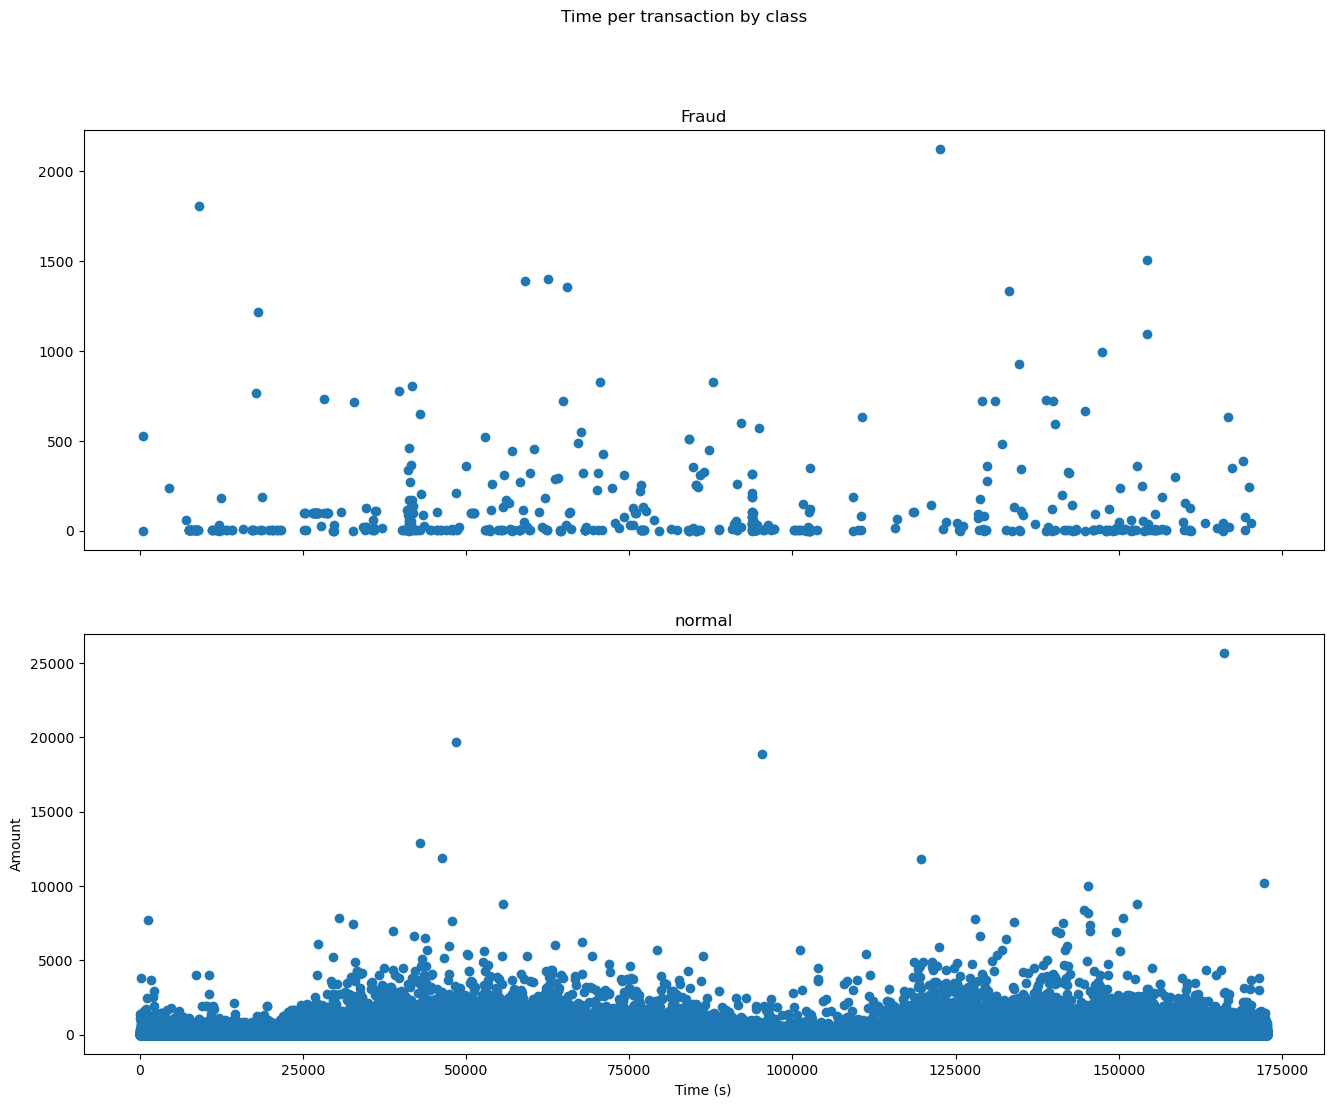

In [14]:
f,(ax1 , ax2) = plt.subplots(2,1 , sharex = True)
f.suptitle("Time per transaction by class")

ax1.scatter(fraud.Time , fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time , normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (s)")
plt.ylabel("Amount")

plt.show()

In [15]:
# taking only 10% of the data for model building

data1 = data.sample(frac = 0.1, random_state = 1)
data1.shape


(28481, 31)

In [16]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

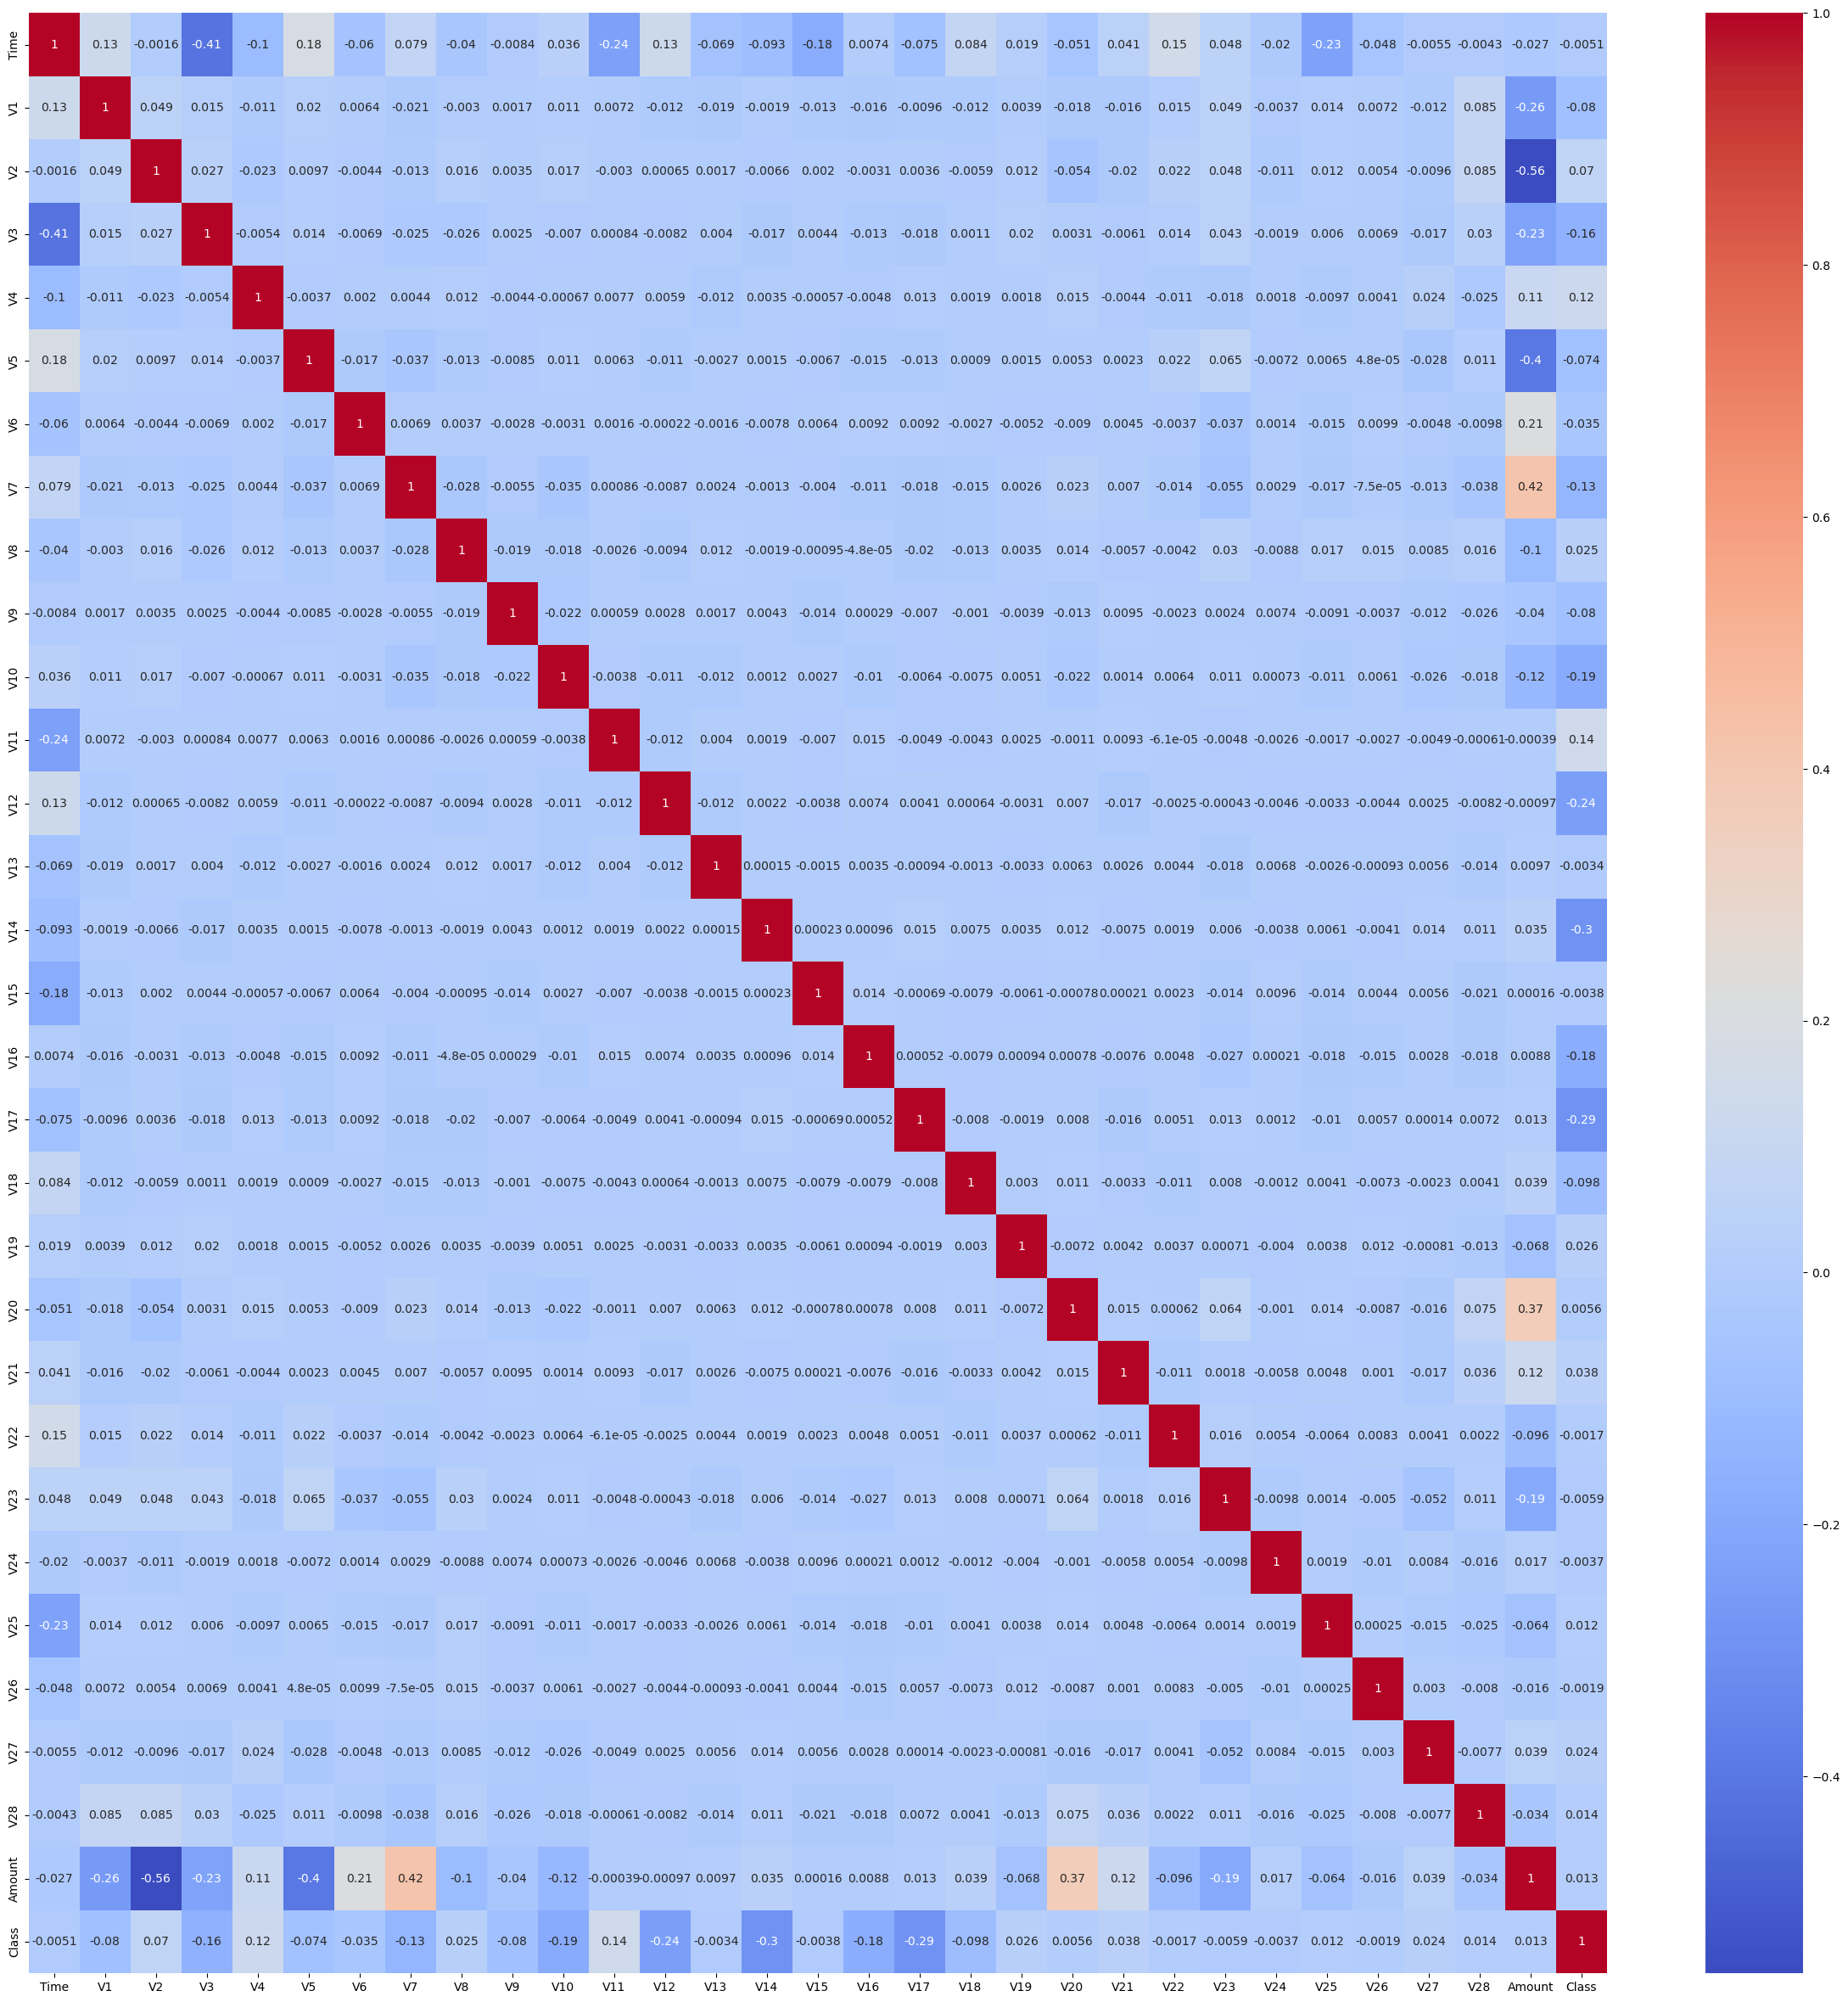

In [17]:
# correlation part:Heat map
corrmat = data1.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(30,30))
g = sns.heatmap(data1[top_corr_feature].corr() , annot = True , cmap = 'coolwarm')

In [18]:
columns = data1.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [19]:
# split the data into target variable and feature variables

x = data1.iloc[:,0:31]
y = data1['Class']
state = np.random.RandomState(101)
x_outlier = state.uniform(low = 0, high = 1, size = (x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(28481, 31)
(28481,)


In [20]:
# split the data into train test for model building

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.70, random_state=119)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

print(classification_report(y_train ,y_pred_train_logit))
print("******"*50)
print(classification_report(y_test ,y_pred_test_logit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19908
           1       0.62      0.54      0.58        28

    accuracy                           1.00     19936
   macro avg       0.81      0.77      0.79     19936
weighted avg       1.00      1.00      1.00     19936

************************************************************************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8524
           1       0.47      0.38      0.42        21

    accuracy                           1.00      8545
   macro avg       0.73      0.69      0.71      8545
weighted avg       1.00      1.00      1.00      8545



In [24]:
print(confusion_matrix(y_train ,y_pred_train_logit))
print("******"*50)
print(confusion_matrix(y_test ,y_pred_test_logit))

[[19899     9]
 [   13    15]]
************************************************************************************************************************************************************************************************************************************************************************************************************
[[8515    9]
 [  13    8]]


In [25]:
print(accuracy_score(y_train ,y_pred_train_logit))
print("******"*50)
print(accuracy_score(y_test ,y_pred_test_logit))

0.9988964686998395
************************************************************************************************************************************************************************************************************************************************************************************************************
0.9974253949678175


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train , y_train)


DecisionTreeClassifier(criterion='entropy')

In [27]:
y_pred_train_dtree = dtree.predict(x_train)
y_pred_test_dtree = dtree.predict(x_test)

In [28]:
print(accuracy_score(y_train ,y_pred_train_dtree))
print("******"*50)
print(accuracy_score(y_test ,y_pred_test_dtree))

1.0
************************************************************************************************************************************************************************************************************************************************************************************************************
1.0


## Random Forest`

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500 , criterion = 'entropy')
rfc.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [30]:
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

In [31]:
print(accuracy_score(y_train ,y_pred_train_rfc))
print("******"*50)
print(accuracy_score(y_test ,y_pred_test_rfc))

1.0
************************************************************************************************************************************************************************************************************************************************************************************************************
0.9997659449970743


## XGBoost

In [33]:
!pip install xgboost

     --------------------------------------- 89.1/89.1 MB 16.0 MB/s eta 0:00:00


In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [35]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [36]:
print(accuracy_score(y_train ,y_pred_train_xgb))
print("******"*50)
print(accuracy_score(y_test ,y_pred_test_xgb))

1.0
************************************************************************************************************************************************************************************************************************************************************************************************************
0.9997659449970743


In [37]:
print(classification_report(y_train ,y_pred_train_xgb))
print("******"*50)
print(classification_report(y_test ,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19908
           1       1.00      1.00      1.00        28

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

************************************************************************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8524
           1       1.00      0.90      0.95        21

    accuracy                           1.00      8545
   macro avg       1.00      0.95      0.97      8545
weighted avg       1.00      1.00      1.00      8545



## Stacking Classifier

In [38]:
!pip install mlxtend

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


In [40]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [42]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 5)
gnb = GaussianNB()
rfc_c = RandomForestClassifier()
lg = LogisticRegression()
sc = StackingClassifier(classifiers = [knn , gnb , rfc_c] , meta_classifier = lg)

print('3-fold cross validation : \n')

for clf , label in zip([knn,gnb,rfc_c,sc],['KNN','Naive Bayes','Random Forest','Stacking Classifier']):
    scores = cross_val_score(clf , x , y , cv=3,scoring = 'accuracy')
    print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean() , scores.std() , label))



3-fold cross validation : 

Accuracy : 1.00 (+/-0.00)[KNN]
Accuracy : 0.99 (+/-0.00)[Naive Bayes]
Accuracy : 1.00 (+/-0.00)[Random Forest]
Accuracy : 1.00 (+/-0.00)[Stacking Classifier]


## Isolation Forest

In [43]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [46]:
Classification = {'Isolation Forest' :IsolationForest(n_estimators = 100 , max_samples = len(x) , 
                                                                contamination = len(fraud)/float(len(valid))),
                  
                 'Local outlier Factor' : LocalOutlierFactor(n_neighbors = 20 , 
                                                                 contamination = len(fraud)/float(len(valid))),
                  
                 'One Class SVM' : OneClassSVM()}

In [48]:
n_outlier = len(fraud)

for i , (clf_name , clf) in enumerate(Classification.items()):
    if clf_name == 'Local outlier Factor':
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name == 'One Class SVM':
        clf.fit(x)
        y_pred = clf.predict(x)
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_error = (y_pred != y).sum()
    
    print("{} : {}".format(clf_name , n_error))
    print("Accuracy Score : ")
    print(accuracy_score(y , y_pred))
    print("Classification Report : ")
    print(classification_report(y,y_pred))
    

Isolation Forest : 69
Accuracy Score : 
0.9975773322565921
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.30      0.31      0.30        49

    accuracy                           1.00     28481
   macro avg       0.65      0.65      0.65     28481
weighted avg       1.00      1.00      1.00     28481

Local outlier Factor : 97
Accuracy Score : 
0.9965942207085425
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

One Class SVM : 14239
Accuracy Score : 
0.5000526666900741
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.50  

# Hence Isolation Forest Model will give best answer 